<a href="https://colab.research.google.com/github/Suryareddy180/Image-Identification-Cats-vs-Dogs-/blob/main/Image_Identification_(Cats_vs_Dogs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file
print("Demo by M.D UshaSri,22a81a6136")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Demo by M.D UshaSri,22a81a6136")

Mounted at /content/drive
Demo by M.D UshaSri,22a81a6136


In [ ]:
import os
import zipfile
#Download and save in google drive from
#URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# Define the dataset path inside Google Drive
google_drive_path = "/content/drive/MyDrive/DL-Lab/Expt No.6-VGG16/cats_and_dogs_filtered (1).zip"

# Define extraction path (where to extract the dataset)
extract_path = "/content/cats_and_dogs_filtered"

# Verify if the dataset exists
if not os.path.exists(google_drive_path):
    print("❌ Dataset file not found! Check the path in Google Drive.")
else:
    print("✅ Dataset found in Google Drive!")

# =========================
if not os.path.exists(extract_path):
    print("🔄 Extracting dataset... Please wait.")
    with zipfile.ZipFile(google_drive_path, 'r') as zip_ref:
        zip_ref.extractall("/content")
    print("✅ Dataset extracted successfully!")
else:
    print("📂 Dataset already extracted.")


✅ Dataset found in Google Drive!
🔄 Extracting dataset... Please wait.
✅ Dataset extracted successfully!


In [ ]:
train_dir = os.path.join(extract_path, 'train')
validation_dir = os.path.join(extract_path, 'validation')

# Check if train and validation directories exist
if not os.path.exists(train_dir) or not os.path.exists(validation_dir):
    print("❌ Training or validation directories are missing!")
else:
    print("✅ Training and validation directories exist.")
    print("📂 Training folder contents:", os.listdir(train_dir))
    print("📂 Validation folder contents:", os.listdir(validation_dir))

✅ Training and validation directories exist.
📂 Training folder contents: ['cats', 'dogs']
📂 Validation folder contents: ['cats', 'dogs']


M.D UshaSri,22a81a6136'Task-6 Dl Lab
✅ Image loaded successfully!
📏 Image Shape: (224, 300, 3)


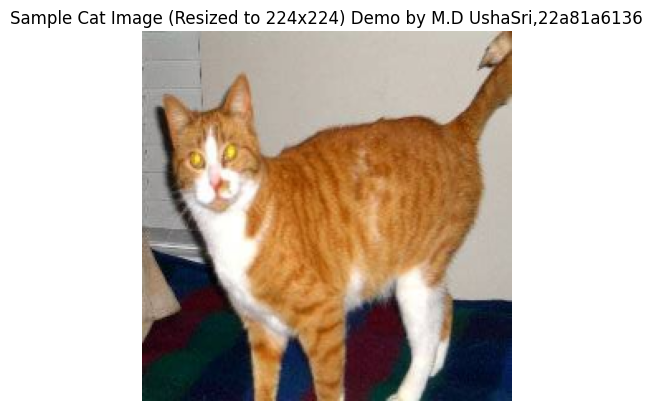

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define a sample image path (change 'cats' to 'dogs' if needed)
sample_image_path = os.path.join(train_dir, 'cats', os.listdir(os.path.join(train_dir, 'cats'))[0])

# Load the image using OpenCV
img = cv2.imread(sample_image_path)
print("M.D UshaSri,22a81a6136'Task-6 Dl Lab")

# Check if the image is loaded correctly
if img is None:
    print("❌ Image not loaded! Check the file path.")
else:
    print("✅ Image loaded successfully!")
    print("📏 Image Shape:", img.shape)  # (Height, Width, Channels)

    # Convert BGR to RGB (OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image to match VGG-16 input size (224x224)
    img_resized = cv2.resize(img_rgb, (224, 224))

    # Display the image using Matplotlib (since cv2.imshow() does not work in Colab)
    plt.imshow(img_resized)
    plt.axis("off")  # Hide axes
    plt.title("Sample Cat Image (Resized to 224x224) Demo by M.D UshaSri,22a81a6136")
    plt.show()


In [ ]:
# Data Augmentation & Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150), batch_size=32, class_mode='binary')
# Corrected variable name from val_dir to validation_dir
val_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu',
input_shape=(150,150,3)),
layers.MaxPooling2D(2,2),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D(2,2),
layers.Conv2D(128, (3,3), activation='relu'),
layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dense(1, activation='sigmoid') # Binary Classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.5290 - loss: 0.7598 - val_accuracy: 0.5900 - val_loss: 0.6759
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.5844 - loss: 0.6725 - val_accuracy: 0.5850 - val_loss: 0.6453
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.6301 - loss: 0.6382 - val_accuracy: 0.6640 - val_loss: 0.6211
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.6860 - loss: 0.5907 - val_accuracy: 0.6810 - val_loss: 0.5976
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.6708 - loss: 0.5912 - val_accuracy: 0.6530 - val_loss: 0.6160
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accuracy: 0.6950 - loss: 0.5841 - val_accuracy: 0.6800 - val_loss: 0.5933
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.7494 - loss: 0.5222 - val_accuracy: 0.7060 - val_loss: 0.5775
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accuracy: 0.7530 - loss: 0.4967 - val_accu

In [ ]:
# Save model
model.save("cats_vs_dogs_classifier.h5")